In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the existing CSV file
df = pd.read_csv('electricity_data_nl_2022_2024_hourly_flow.csv', index_col=0, parse_dates=True)
print("CSV file loaded successfully!")

df.index.name = 'date'

# Zorg ervoor dat de datumkolom wordt herkend als datetime
df['date'] = pd.to_datetime(df['date'])



CSV file loaded successfully!


KeyError: 'date'

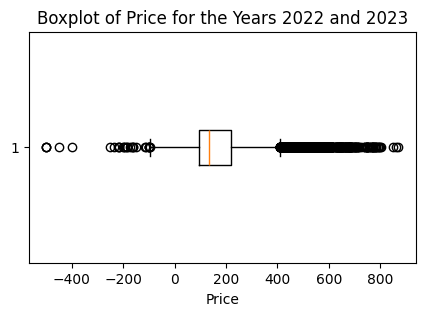

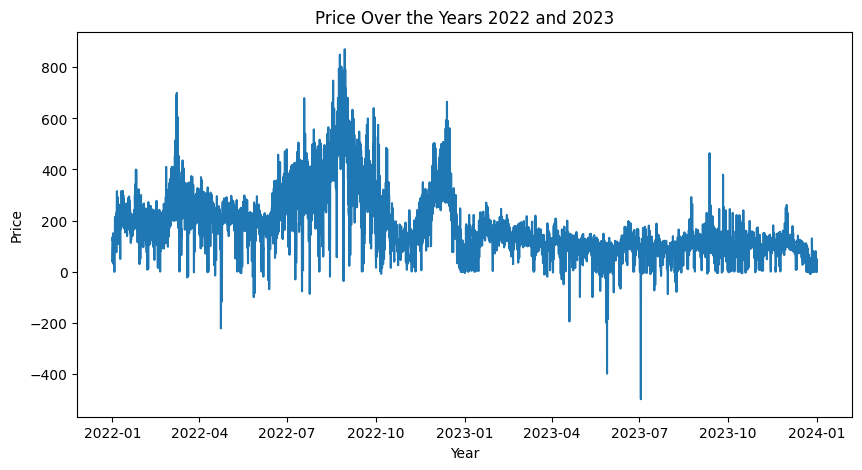

In [2]:
# Ensure the date column is recognized as datetime
df.index = pd.to_datetime(df.index)
# Ensure the index is recognized as datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the years 2022 and 2023
df_filtered = df.loc['2022-01-01':'2023-12-31']

# Create a boxplot of the Price column for the years 2022 and 2023
plt.figure(figsize=(5,3))
plt.boxplot(df_filtered['Price'].dropna(), vert=False)
plt.xlabel('Price')
plt.title('Boxplot of Price for the Years 2022 and 2023')
plt.show()

# Plot the load over the years 2022 and 2023
plt.figure(figsize=(10,5))
plt.plot(df_filtered.index, df_filtered['Price'], label='Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price Over the Years 2022 and 2023')
plt.show()



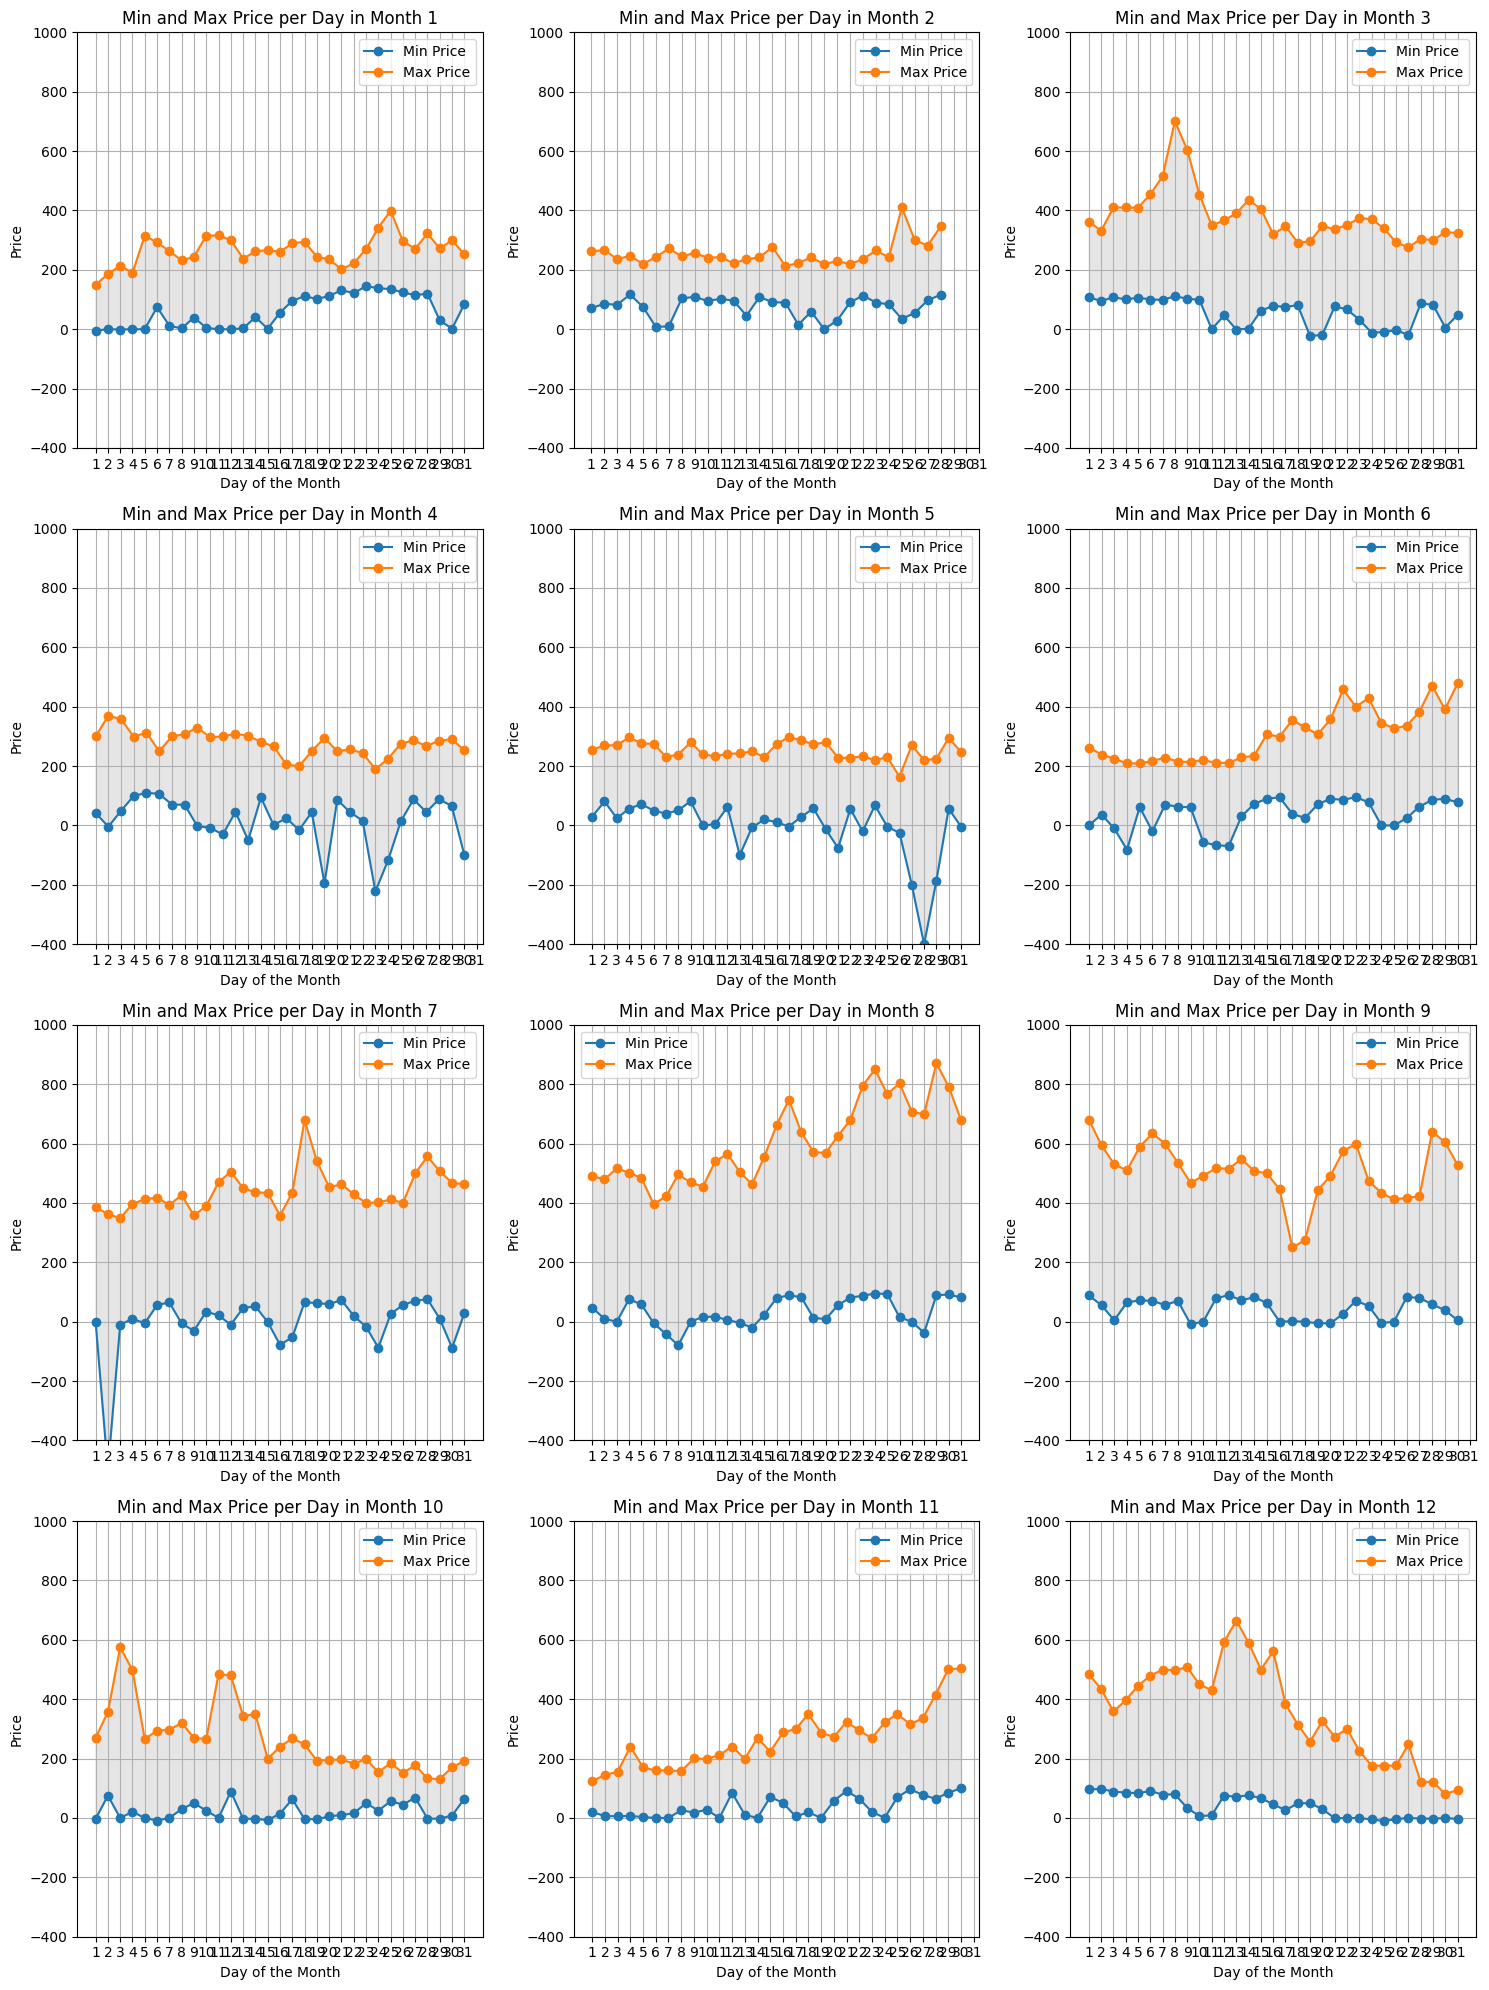

In [3]:
# Drop rows with missing values in 'Price' column
df_filtered_price = df_filtered[['Price']].dropna()

# Extract the month and day from the index
df_filtered_price['Month'] = df_filtered_price.index.month
df_filtered_price['Day'] = df_filtered_price.index.day

# Plot the minimum and maximum price per day for each month
plt.figure(figsize=(15, 20))
for month in range(1, 13):
    plt.subplot(4, 3, month)
    month_data = df_filtered_price[df_filtered_price['Month'] == month]
    daily_min_price = month_data.groupby(month_data.index.day)['Price'].min()
    daily_max_price = month_data.groupby(month_data.index.day)['Price'].max()
    plt.plot(daily_min_price.index, daily_min_price, marker='o', linestyle='-', label='Min Price')
    plt.plot(daily_max_price.index, daily_max_price, marker='o', linestyle='-', label='Max Price')
    plt.fill_between(daily_min_price.index, daily_min_price, daily_max_price, color='gray', alpha=0.2)
    plt.xlabel('Day of the Month')
    plt.ylabel('Price')
    plt.title(f'Min and Max Price per Day in Month {month}')
    plt.xticks(range(1, 32))  # Ensure all days are shown on the x-axis
    plt.grid(True)
    plt.ylim(-400,1000)
    plt.legend()

plt.tight_layout()
plt.show()

In [4]:
df_filtered.head

<bound method NDFrame.head of                                Load   Price  Flow_BE_to_NL  Flow_NL_to_BE  \
date                                                                        
2022-01-01 00:00:00+00:00  10249.75  124.70            0.0          728.0   
2022-01-01 01:00:00+00:00   9907.00  134.00            0.0         1070.0   
2022-01-01 02:00:00+00:00   9782.50   58.80            0.0          344.0   
2022-01-01 03:00:00+00:00   9589.75   37.67            0.0          154.0   
2022-01-01 04:00:00+00:00   9508.00   39.70          352.0            0.0   
...                             ...     ...            ...            ...   
2023-12-31 19:00:00+00:00  12919.50   34.89         1709.0            0.0   
2023-12-31 20:00:00+00:00  12269.00   13.30         1579.0            0.0   
2023-12-31 21:00:00+00:00  11774.25   10.68          819.0            0.0   
2023-12-31 22:00:00+00:00  11458.00    3.17          934.0            0.0   
2023-12-31 23:00:00+00:00  11273.25    0.10   

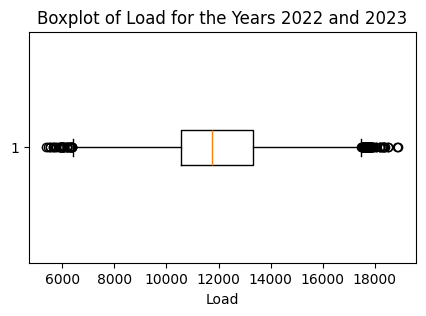

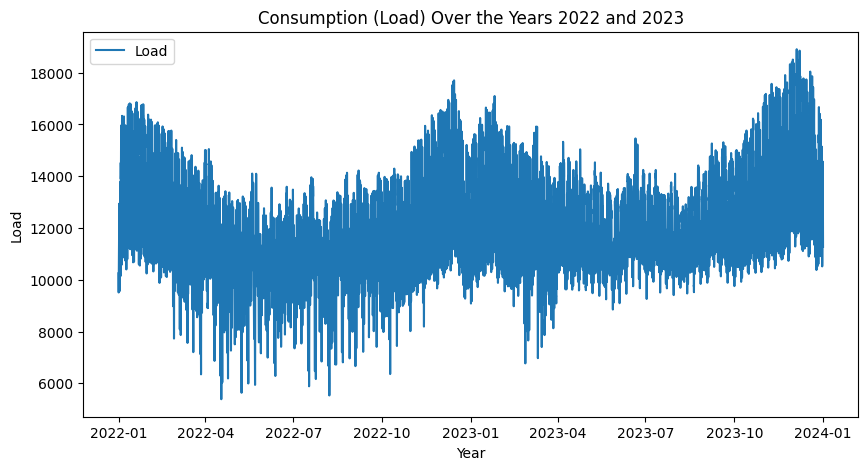

In [5]:
# Filter the data for the years 2022 and 2023
df_filtered = df.loc['2022-01-01':'2023-12-31']

# Create a boxplot of the Load column for the years 2022 and 2023
plt.figure(figsize=(5,3))
plt.boxplot(df_filtered['Load'].dropna(), vert=False)
plt.xlabel('Load')
plt.title('Boxplot of Load for the Years 2022 and 2023')
plt.show()

# Plot the load over the years 2022 and 2023
plt.figure(figsize=(10,5))
plt.plot(df_filtered.index, df_filtered['Load'], label='Load')
plt.xlabel('Year')
plt.ylabel('Load')
plt.title('Consumption (Load) Over the Years 2022 and 2023')
plt.legend()
plt.show()





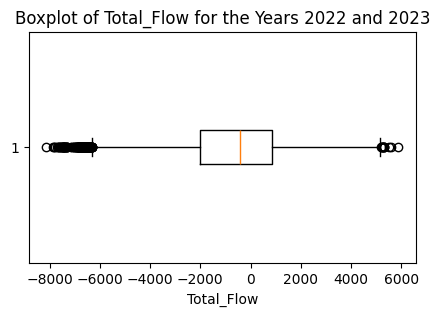

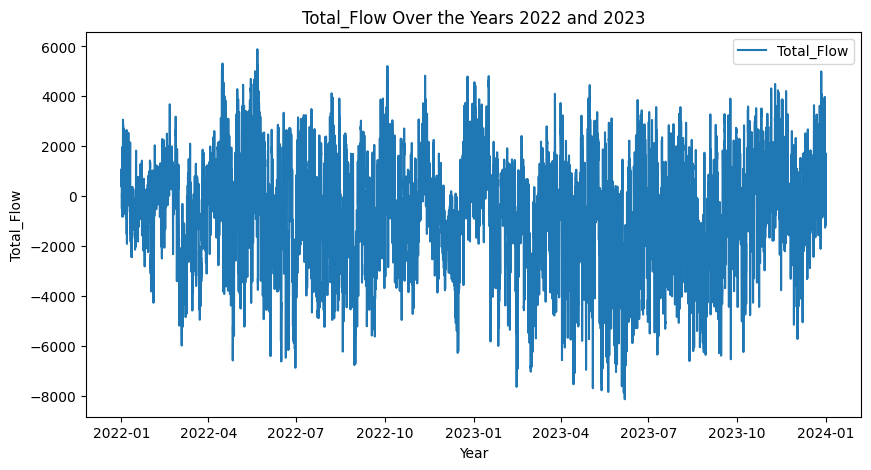

In [6]:
# Filter the data for the years 2022 and 2023
df_filtered = df.loc['2022-01-01':'2023-12-31']

# Create a boxplot of the Total_Flow column for the years 2022 and 2023
plt.figure(figsize=(5,3))
plt.boxplot(df_filtered['Total_Flow'].dropna(), vert=False)
plt.xlabel('Total_Flow')
plt.title('Boxplot of Total_Flow for the Years 2022 and 2023')
plt.show()

# Plot the load over the years 2022 and 2023
plt.figure(figsize=(10,5))
plt.plot(df_filtered.index, df_filtered['Total_Flow'], label='Total_Flow')
plt.xlabel('Year')
plt.ylabel('Total_Flow')
plt.title('Total_Flow Over the Years 2022 and 2023')
plt.legend()
plt.show()


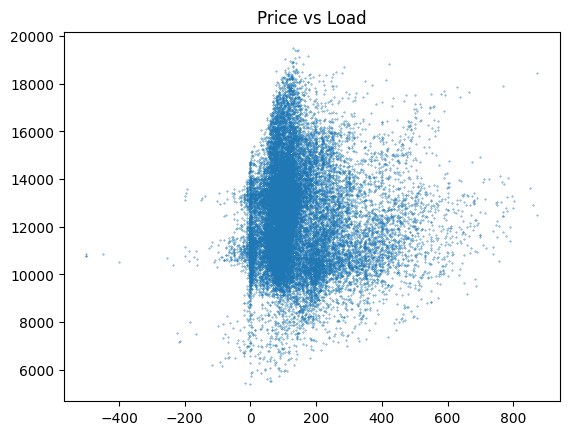

In [7]:
plt.scatter(df['Price'], df['Load'], s = 0.1)
plt.title('Price vs Load')
plt.show()

In [8]:
import numpy as np

# Filter the data for the years 2022 and 2023
df_filtered = df.loc['2022-01-01':'2023-12-31']

# Drop rows with missing values in 'Price' or 'Load' columns
df_filtered_pl = df_filtered[['Price', 'Load']].dropna()

# Calculate the correlation coefficient
r = np.corrcoef(df_filtered_pl['Price'], df_filtered_pl['Load'])
print("Correlation coefficient matrix:")
print(r)

Correlation coefficient matrix:
[[1.         0.06333713]
 [0.06333713 1.        ]]


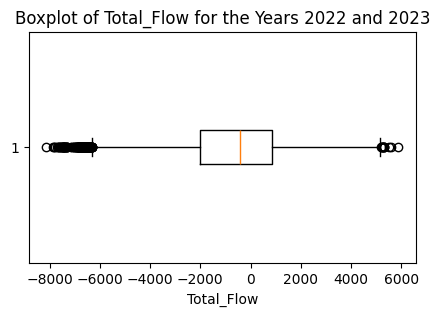

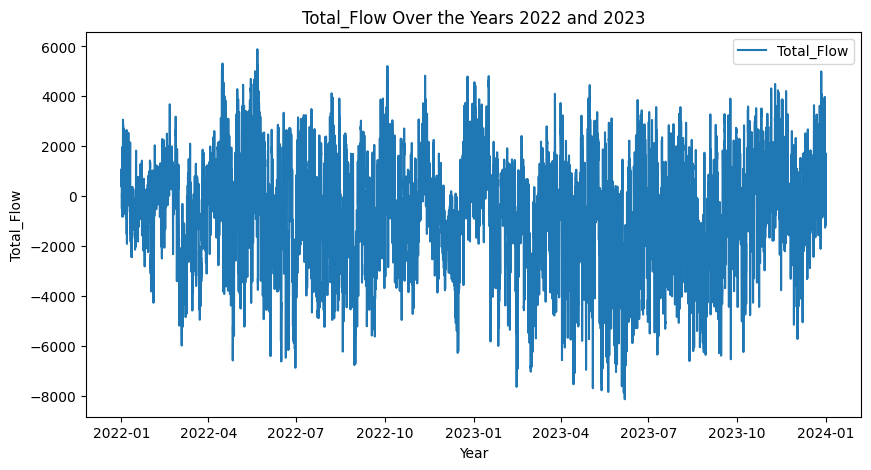

In [9]:
# Create a boxplot of the Total_Flow column for the years 2022 and 2023
plt.figure(figsize=(5,3))
plt.boxplot(df_filtered['Total_Flow'].dropna(), vert=False)
plt.xlabel('Total_Flow')
plt.title('Boxplot of Total_Flow for the Years 2022 and 2023')
plt.show()

# Plot the load over the years 2022 and 2023
plt.figure(figsize=(10,5))
plt.plot(df_filtered.index, df_filtered['Total_Flow'], label='Total_Flow')
plt.xlabel('Year')
plt.ylabel('Total_Flow')
plt.title('Total_Flow Over the Years 2022 and 2023')
plt.legend()
plt.show()


C:\Users\shba\AppData\Local\Temp\ipykernel_16348\4206944020.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', 7)  # Use a colormap with 7 distinct colors


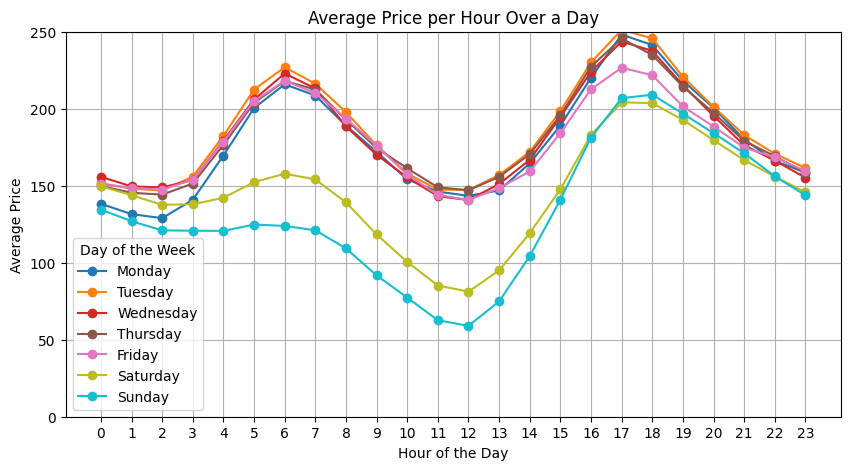

In [10]:
# Drop rows with missing values in 'Price' column
df_filtered_price = df_filtered[['Price']].dropna()

# Extract the hour and day of the week from the index
df_filtered_price['Hour'] = df_filtered_price.index.hour
df_filtered_price['DayOfWeek'] = df_filtered_price.index.dayofweek

# Define a color map for the days of the week
colors = plt.cm.get_cmap('tab10', 7)  # Use a colormap with 7 distinct colors

# Plot the average price per hour for each day of the week
plt.figure(figsize=(10, 5))
for day in range(7):
    day_data = df_filtered_price[df_filtered_price['DayOfWeek'] == day]
    average_price_per_hour = day_data.groupby('Hour')['Price'].mean()
    plt.plot(average_price_per_hour.index, average_price_per_hour, marker='o', linestyle='-', color=colors(day), label=f'Day {day}')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.title('Average Price per Hour Over a Day')
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.legend(title='Day of the Week', labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim(0, 250)
plt.show()

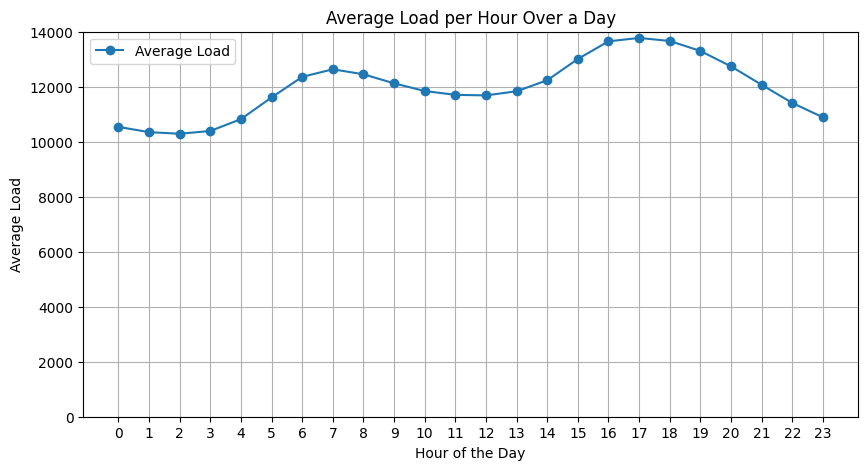

In [11]:
# Drop rows with missing values in 'Load' column
df_filtered_load = df_filtered[['Load']].dropna()

# Extract the hour from the index
df_filtered_load['Hour'] = df_filtered_load.index.hour

# Calculate the average price per hour
average_load_per_hour = df_filtered_load.groupby('Hour')['Load'].mean()

# Plot the average price per hour
plt.figure(figsize=(10,5))
plt.plot(average_load_per_hour.index, average_load_per_hour, marker='o', linestyle='-', label='Average Load')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Load')
plt.title('Average Load per Hour Over a Day')
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.legend()
plt.ylim(0,14000)
plt.show()

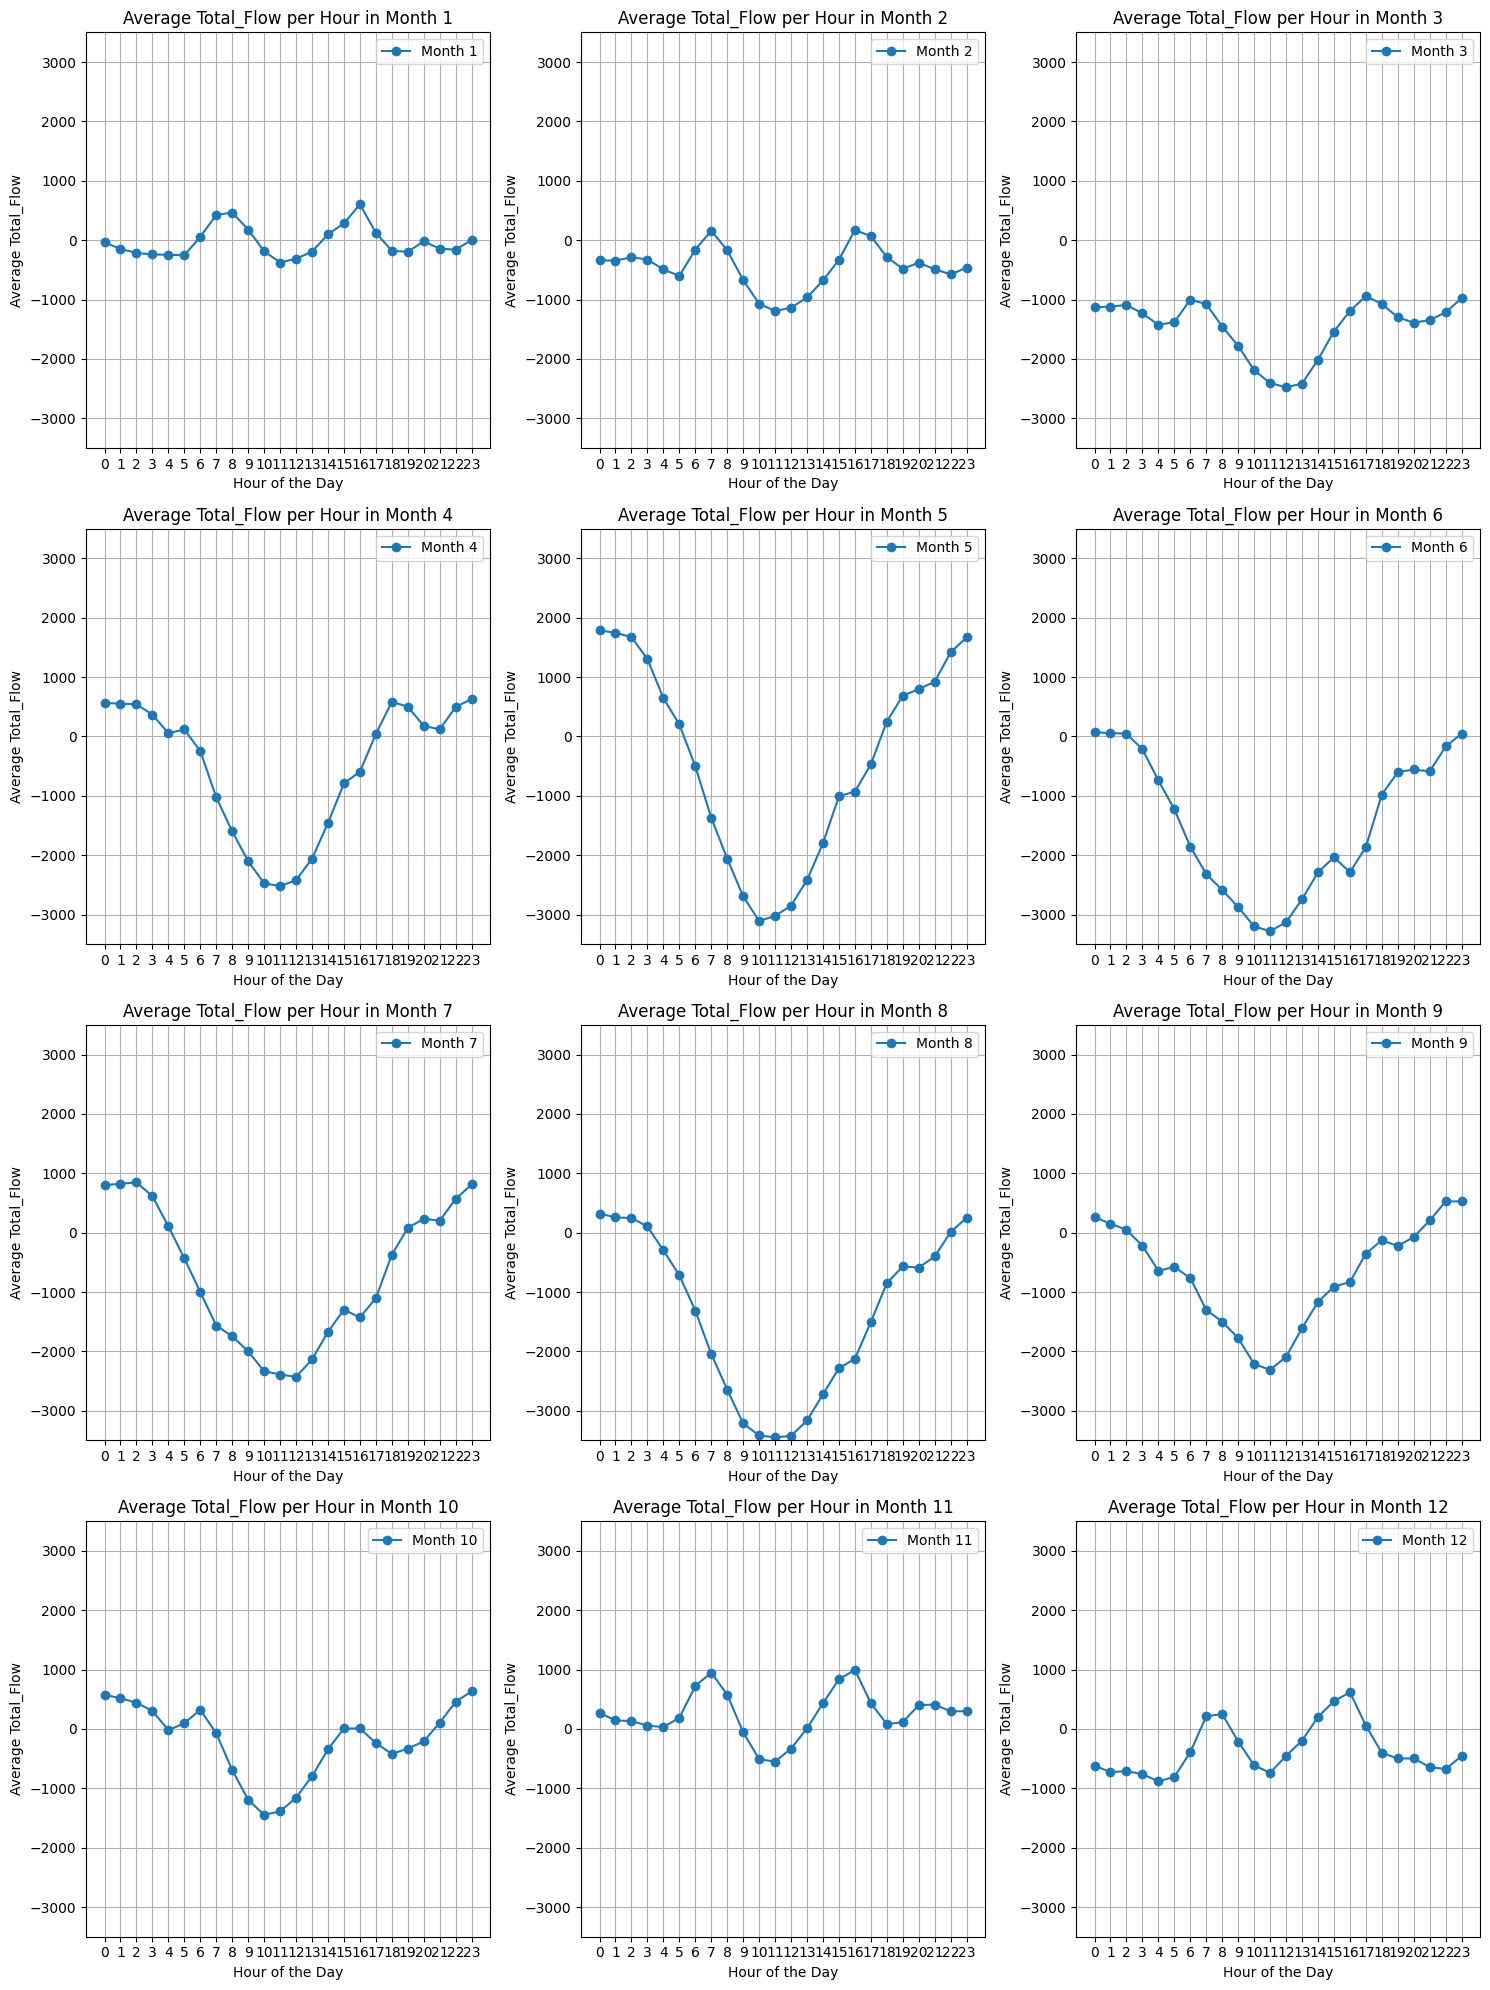

In [12]:
# Drop rows with missing values in 'Total_Flow' column
df_filtered_flow = df_filtered[['Total_Flow']].dropna()

# Extract the hour and month from the index
df_filtered_flow['Hour'] = df_filtered_flow.index.hour
df_filtered_flow['Month'] = df_filtered_flow.index.month

# Plot the average Total_Flow per hour for each month
plt.figure(figsize=(15, 20))
for month in range(1, 13):
    plt.subplot(4, 3, month)
    month_data = df_filtered_flow[df_filtered_flow['Month'] == month]
    average_total_flow_per_hour = month_data.groupby('Hour')['Total_Flow'].mean()
    plt.plot(average_total_flow_per_hour.index, average_total_flow_per_hour, marker='o', linestyle='-', label=f'Month {month}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Total_Flow')
    plt.title(f'Average Total_Flow per Hour in Month {month}')
    plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
    plt.grid(True)
    plt.ylim(-3500,3500)
    plt.legend()

plt.tight_layout()
plt.show()

C:\Users\shba\AppData\Local\Temp\ipykernel_16348\3866011731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Flow_import'] = df_filtered['Flow_BE_to_NL'] + df_filtered['Flow_DE_to_NL'] + df_filtered['Flow_DK_to_NL'] + df_filtered['Flow_GB_to_NL'] + df_filtered['Flow_NO_to_NL']
C:\Users\shba\AppData\Local\Temp\ipykernel_16348\3866011731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Flow_export'] = df_filtered['Flow_NL_to_BE'] + df_filtered['Flow_NL_to_DE'] + df_filtered['Fl

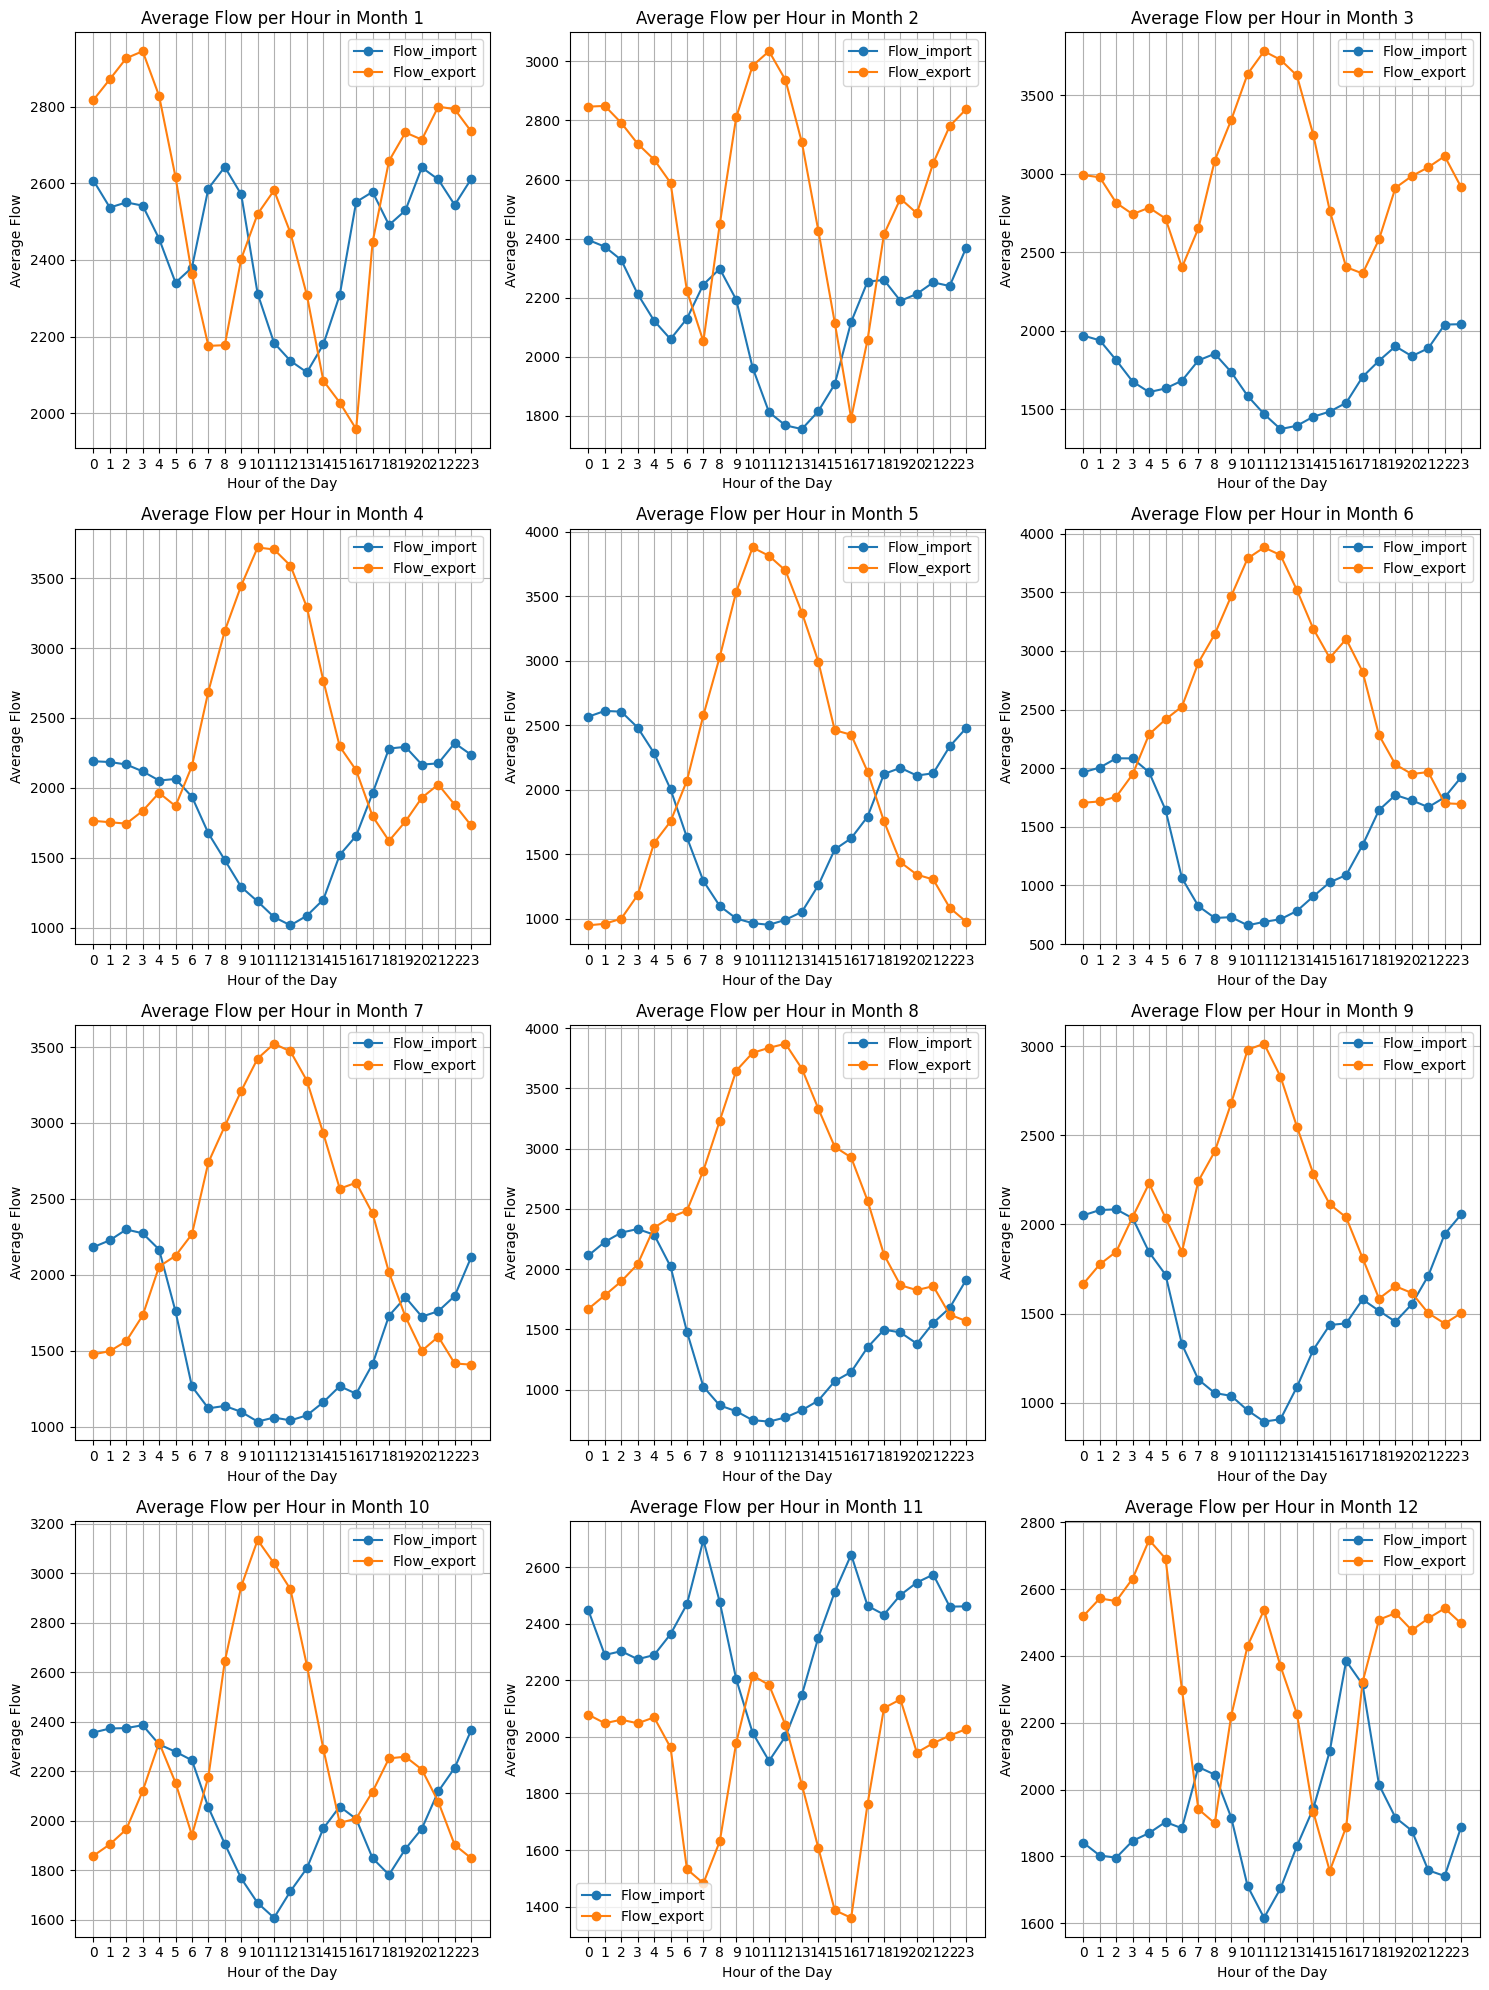

In [13]:
df_filtered['Flow_import'] = df_filtered['Flow_BE_to_NL'] + df_filtered['Flow_DE_to_NL'] + df_filtered['Flow_DK_to_NL'] + df_filtered['Flow_GB_to_NL'] + df_filtered['Flow_NO_to_NL']
df_filtered['Flow_export'] = df_filtered['Flow_NL_to_BE'] + df_filtered['Flow_NL_to_DE'] + df_filtered['Flow_NL_to_DK'] + df_filtered['Flow_NL_to_GB'] + df_filtered['Flow_NL_to_NO']

df_filtered['Hour'] = df_filtered.index.hour
df_filtered['Month'] = df_filtered.index.month

# Plot the average Flow_import and Flow_export per hour for each month
plt.figure(figsize=(15, 20))
for month in range(1, 13):
    plt.subplot(4, 3, month)
    month_data = df_filtered[df_filtered['Month'] == month]
    average_flow_import_per_hour = month_data.groupby('Hour')['Flow_import'].mean()
    average_flow_export_per_hour = month_data.groupby('Hour')['Flow_export'].mean()
    plt.plot(average_flow_import_per_hour.index, average_flow_import_per_hour, marker='o', linestyle='-', label='Flow_import')
    plt.plot(average_flow_export_per_hour.index, average_flow_export_per_hour, marker='o', linestyle='-', label='Flow_export')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Flow')
    plt.title(f'Average Flow per Hour in Month {month}')
    plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

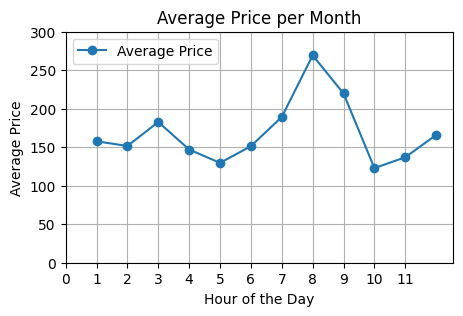

In [14]:
# Extract the month from the index
df_filtered_price['Month'] = df_filtered_price.index.month

# Calculate the average price per month
average_price_per_month = df_filtered_price.groupby('Month')['Price'].mean()

# Plot the average price per month
plt.figure(figsize=(5,3))
plt.plot(average_price_per_month.index, average_price_per_month, marker='o', linestyle='-', label='Average Price')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.title('Average Price per Month')
plt.xticks(range(12))  # Ensure all months are shown on the x-axis
plt.grid(True)
plt.legend()
plt.ylim(0,300)
plt.show()

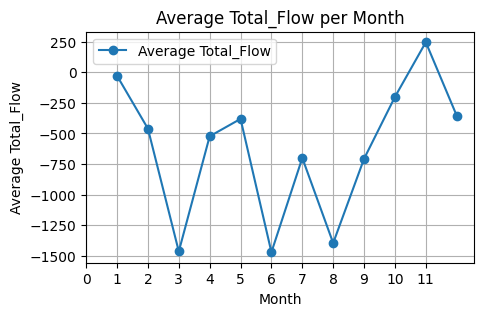

In [15]:
# Drop rows with missing values in 'Total_Flow' column
df_filtered_flow= df_filtered[['Total_Flow']].dropna()

# Extract the month from the index
df_filtered_flow['Month'] = df_filtered_flow.index.month

# Calculate the average price per month
average_price_per_hour = df_filtered_flow.groupby('Month')['Total_Flow'].mean()

# Plot the average price per month
plt.figure(figsize=(5,3))
plt.plot(average_price_per_hour.index, average_price_per_hour, marker='o', linestyle='-', label='Average Total_Flow')
plt.xlabel('Month')
plt.ylabel('Average Total_Flow')
plt.title('Average Total_Flow per Month')
plt.xticks(range(12))  # Ensure all months are shown on the x-axis
plt.grid(True)
plt.legend()
plt.show()